# 1. Install and Import Dependencies

In [87]:
# # GitHub repo installation of paddle
# !python -m pip install paddlepaddle -i https://mirror.baidu.com/pypi/simple

In [88]:
# # Install paddle OCR
# !pip install paddleocr

In [89]:
from paddleocr import PaddleOCR, draw_ocr
from matplotlib import pyplot as plt
import cv2
import os
from pdf2image import convert_from_path

In [90]:
# Store pdf with convert_from_path function
images = convert_from_path(pdf_path='Data Folder/BCA.pdf')
for index, img in enumerate(images):
    img.save(f'Output (Images)\page{index + 1}.jpg', 'JPEG')

# 2. Instantiate Model and Detect

In [91]:
ocr_model = PaddleOCR(use_angle_cls = True, use_gpu = False)

[2021/10/18 22:29:31] root WARNING: version PP-OCRv2 not support cls models, use version PP-OCR instead
download https://paddleocr.bj.bcebos.com/PP-OCRv2/chinese/ch_PP-OCRv2_det_infer.tar to C:\Users\Jun/.paddleocr/2.3.0.1\ocr\det\ch\ch_PP-OCRv2_det_infer\ch_PP-OCRv2_det_infer.tar
[2021/10/18 22:29:32] urllib3.connectionpool DEBUG: Starting new HTTPS connection (1): paddleocr.bj.bcebos.com:443
[2021/10/18 22:29:58] urllib3.connectionpool DEBUG: https://paddleocr.bj.bcebos.com:443 "GET /PP-OCRv2/chinese/ch_PP-OCRv2_det_infer.tar HTTP/1.1" 200 3190272


100%|██████████| 3.19M/3.19M [01:20<00:00, 39.8kiB/s]

download https://paddleocr.bj.bcebos.com/PP-OCRv2/chinese/ch_PP-OCRv2_rec_infer.tar to C:\Users\Jun/.paddleocr/2.3.0.1\ocr\rec\ch\ch_PP-OCRv2_rec_infer\ch_PP-OCRv2_rec_infer.tar
[2021/10/18 22:31:18] urllib3.connectionpool DEBUG: Starting new HTTPS connection (1): paddleocr.bj.bcebos.com:443


[2021/10/18 22:31:42] urllib3.connectionpool DEBUG: https://paddleocr.bj.bcebos.com:443 "GET /PP-OCRv2/chinese/ch_PP-OCRv2_rec_infer.tar HTTP/1.1" 200 8875520


100%|██████████| 8.88M/8.88M [02:23<00:00, 61.7kiB/s]


Namespace(help='==SUPPRESS==', use_gpu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, image_dir=None, det_algorithm='DB', det_model_dir='C:\\Users\\Jun/.paddleocr/2.3.0.1\\ocr\\det\\ch\\ch_PP-OCRv2_det_infer', det_limit_side_len=960, det_limit_type='max', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_sast_polygon=False, rec_algorithm='CRNN', rec_model_dir='C:\\Users\\Jun/.paddleocr/2.3.0.1\\ocr\\rec\\ch\\ch_PP-OCRv2_rec_infer', rec_image_shape='3, 32, 320', rec_char_type='ch', rec_batch_num=6, max_text_length=25, rec_char_dict_path='c:\\Users\\Jun\\Desktop\\RDS3\\FYP2\\venv\\lib\\site-packages\\paddleocr\\ppocr\\utils\\ppocr_keys_v1.txt', use_space_char=True, vis_font_path='./doc/fonts/simfang.ttf', drop_score=0.5, e2e_al

In [111]:
img_path = os.path.join('.', 'Output (Images)\page1.jpg')
img_path

'.\\Output (Images)\\page1.jpg'

In [112]:
result = ocr_model.ocr(img_path, cls=True)

[2021/10/18 22:45:24] root DEBUG: dt_boxes num : 112, elapse : 1.5097367763519287
[2021/10/18 22:45:27] root DEBUG: cls num  : 112, elapse : 2.724307060241699
[2021/10/18 22:45:55] root DEBUG: rec_res num  : 112, elapse : 27.558847427368164


In [113]:
result

[[[[66.0, 124.0], [312.0, 124.0], [312.0, 202.0], [66.0, 202.0]],
  ('DBCA', 0.85119367)],
 [[[583.0, 153.0], [1065.0, 153.0], [1065.0, 195.0], [583.0, 195.0]],
  ('REKENING TAHAPAN', 0.9632065)],
 [[[79.0, 268.0], [214.0, 268.0], [214.0, 295.0], [79.0, 295.0]],
  ('SOE TA WIE', 0.95781815)],
 [[[900.0, 270.0], [1077.0, 270.0], [1077.0, 297.0], [900.0, 297.0]],
  ('NO.REKENING', 0.9865494)],
 [[[1220.0, 273.0], [1353.0, 273.0], [1353.0, 300.0], [1220.0, 300.0]],
  ('7030073392', 0.8712082)],
 [[[81.0, 300.0], [192.0, 300.0], [192.0, 326.0], [81.0, 326.0]],
  ('CIPONDOH', 0.9863733)],
 [[[905.0, 312.0], [1026.0, 312.0], [1026.0, 339.0], [905.0, 339.0]],
  ('HALAMAN', 0.9811996)],
 [[[1223.0, 312.0], [1284.0, 312.0], [1284.0, 339.0], [1223.0, 339.0]],
  ('1/4', 0.84322494)],
 [[[79.0, 331.0], [339.0, 331.0], [339.0, 363.0], [79.0, 363.0]],
  ('PETIR RT 013 RW 003', 0.88671154)],
 [[[905.0, 346.0], [1016.0, 346.0], [1016.0, 380.0], [905.0, 380.0]],
  ('PERIODE', 0.99531984)],
 [[[1220.0, 

In [114]:
# Box coordinates
result[0][0]

[[66.0, 124.0], [312.0, 124.0], [312.0, 202.0], [66.0, 202.0]]

In [115]:
# Test and its confidence scores
result[0][1]

('DBCA', 0.85119367)

In [116]:
# Print all texts on an image (page 1)
for res in result:
    print(res[1][0])

DBCA
REKENING TAHAPAN
SOE TA WIE
NO.REKENING
7030073392
CIPONDOH
HALAMAN
1/4
PETIR RT 013 RW 003
PERIODE
JANUARI 2021
JL PETIR UTAMA 66
MATA UANG
IDR
TANGERANG 15147
INDONESIA
CATATAN:
REKEnING Ini SAMP:
BCAberha
menyetujuisegaladatayang
Rekening.
adaLaporanMutasiRekeningint
TANGGAL
KETERANGAN
CBG
MUTASI
SALDO
01/01
SALDO AWAL
636,953,471.73
18/8
3.ADM KLIRING
7030
2.000.00 DB
4/
636,951471.73
TRSF E-BANKING CR
0401/FTSCY/WS95051
100.000.000.00
100000000.00
P DEVIDEN
TIGA CAKRA SUKSES
04/01
TARIKAN ATM 04/01
500000.00 DB
04/01
TRSF E-BANKING CR
0401/FTSCY/WS95011
2000.000.00
2000000.00
Selisih ATK
SOE TA WIE
TRSF E-BANKING DB
04/01
0401/FTSCY/WS95051
100000.00 DB
100000.00
TANUMIHARDJ
TRSF E-BANKING CR
0401/FTSCY/WS95051
04/01
2,045,567.00
2045567.00
P DEVIDEN
TIGA CAKRA SUKSES
04/01
KARTU DEBIT
LOTTEMART
100.00 DB
TRSF E-BANKING DB
04/01
0401/FTFVA/WS95051
501000.00 DB
39358/0VO
087887950120
04/01
TRSF E-BANKING CR
0401/FTSCY/WS95051
46.276830.00
46276830.00
JS581L
SOE TA WIE
SOE TA W

In [117]:
# Store all texts in a comprehension list
[res[1][0] for res in result]

['DBCA',
 'REKENING TAHAPAN',
 'SOE TA WIE',
 'NO.REKENING',
 '7030073392',
 'CIPONDOH',
 'HALAMAN',
 '1/4',
 'PETIR RT 013 RW 003',
 'PERIODE',
 'JANUARI 2021',
 'JL PETIR UTAMA 66',
 'MATA UANG',
 'IDR',
 'TANGERANG 15147',
 'INDONESIA',
 'CATATAN:',
 'REKEnING Ini SAMP:',
 'BCAberha',
 'menyetujuisegaladatayang',
 'Rekening.',
 'adaLaporanMutasiRekeningint',
 'TANGGAL',
 'KETERANGAN',
 'CBG',
 'MUTASI',
 'SALDO',
 '01/01',
 'SALDO AWAL',
 '636,953,471.73',
 '18/8',
 '3.ADM KLIRING',
 '7030',
 '2.000.00 DB',
 '4/',
 '636,951471.73',
 'TRSF E-BANKING CR',
 '0401/FTSCY/WS95051',
 '100.000.000.00',
 '100000000.00',
 'P DEVIDEN',
 'TIGA CAKRA SUKSES',
 '04/01',
 'TARIKAN ATM 04/01',
 '500000.00 DB',
 '04/01',
 'TRSF E-BANKING CR',
 '0401/FTSCY/WS95011',
 '2000.000.00',
 '2000000.00',
 'Selisih ATK',
 'SOE TA WIE',
 'TRSF E-BANKING DB',
 '04/01',
 '0401/FTSCY/WS95051',
 '100000.00 DB',
 '100000.00',
 'TANUMIHARDJ',
 'TRSF E-BANKING CR',
 '0401/FTSCY/WS95051',
 '04/01',
 '2,045,567.00',
 '

# 3. Visualise Results

In [118]:
boxes = [res[0] for res in result]
texts = [res[1][0] for res in result]
scores = [res[1][1] for res in result]

In [119]:
# Specifying font path for draw_ocr method
font_path = os.path.join('fonts', 'latin.ttf')
font_path

'fonts\\latin.ttf'

In [120]:
# Imports image
img = cv2.imread(img_path) 

# Reorders the color channels
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

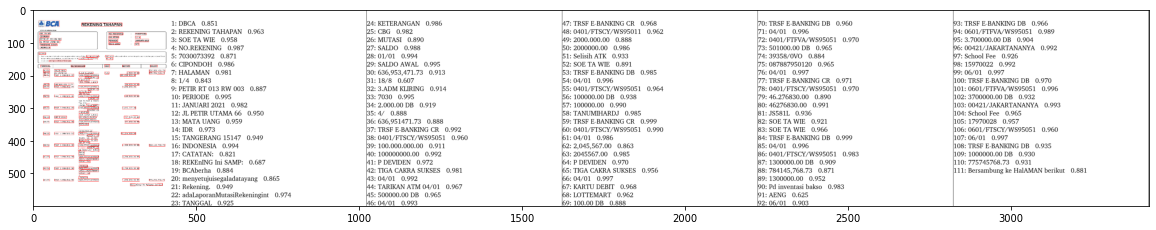

In [121]:
# Visualize our image and detections

# Resizing display area
plt.figure(figsize=(20, 20))

# Draw annotations on image
annotated = draw_ocr(img, boxes, texts, scores, font_path=font_path) 

# Show the image using matplotlib
plt.imshow(annotated)

In [122]:
type(img)

numpy.ndarray

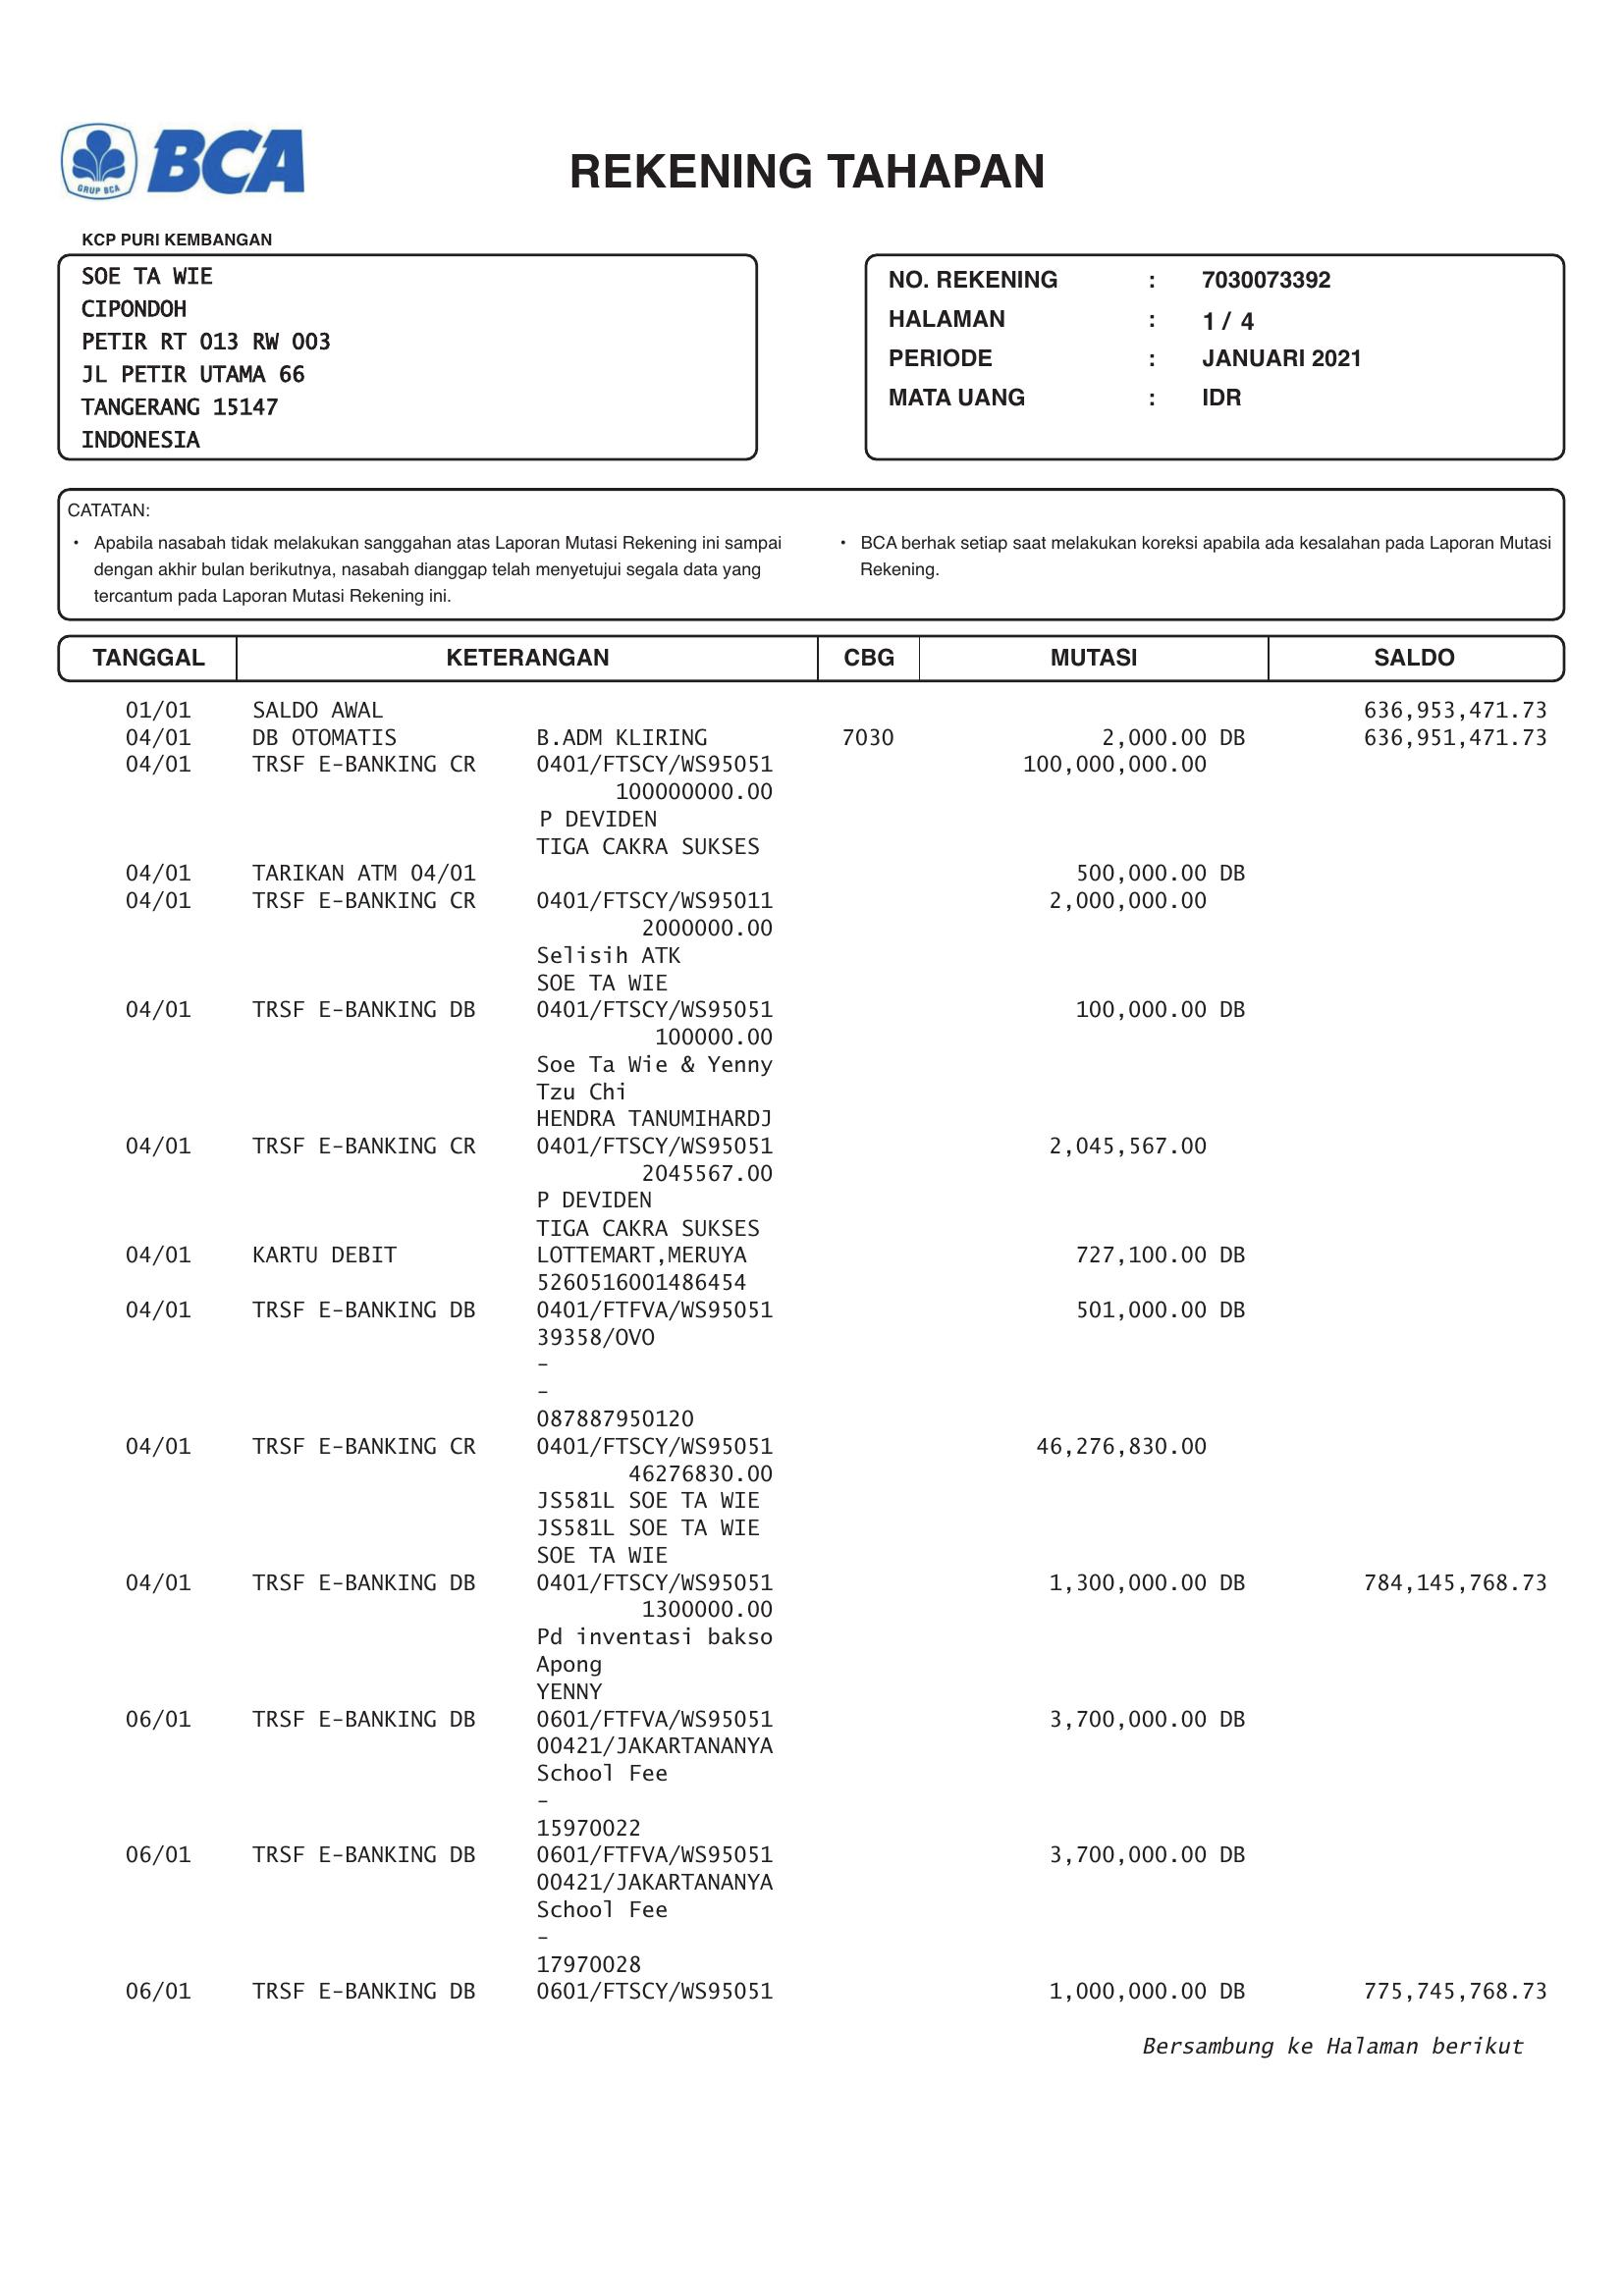

In [124]:
# Draw results using PIL

from PIL import Image

# Reorders the color channels of the image
image = Image.open(img_path).convert('RGB')

# Draw annotations on image
annotated = draw_ocr(image, boxes, texts, scores, font_path=font_path) 
annotated_image = Image.fromarray(annotated)
annotated.save('result.jpg')